Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="" # disable GPU
ROOT = '/data/cvfs/ah2029/datasets/gym/carracing/'

DATA_DIR = os.path.join(ROOT, 'record')
model_path_name = os.path.join(ROOT, 'tf_vae')

beta_vae_name = 'vae_beta_5.0.json'
z_size=32

In [6]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

beta_vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, beta_vae_name))
beta_vae.load_json(os.path.join(model_path_name, beta_vae_name))

INFO:tensorflow:Model using cpu.
INFO:tensorflow:Model using cpu.


### Compare disentanglement

In [7]:
filelist = os.listdir(DATA_DIR)

In [46]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

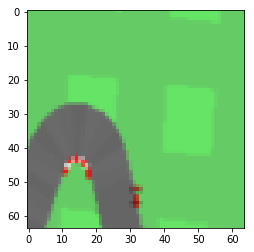

In [47]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])

In [54]:
def plot_latent_variations(frame, vae, factor=0):
    batch_z = vae.encode(frame)
    print('Latent vector z')
    print(batch_z[0]) # print out sampled z
    reconstruct = vae.decode(batch_z)
    
    plt.figure(figsize=((10, 5)))
    plt.subplot(121)
    plt.imshow(frame[0])
    plt.title('Original')
    # show reconstruction
    plt.subplot(122)
    plt.imshow(reconstruct[0])
    plt.title('Reconstruction')
    plt.show()

    print('Visualise latent factor {}, original value={:.2f}'.format(factor, batch_z[0][factor]))
    batch_z_copy = batch_z.copy()
    plt.figure(figsize=(20, 5))
    for i, value in enumerate(np.linspace(-1.5, 1.5, 10)):
        batch_z_copy[0, factor] = value
        reconstruct = vae.decode(batch_z_copy)
        # show reconstruction
        plt.subplot(1, 10, i+1)
        plt.imshow(reconstruct[0])
        plt.title('{:.2f}'.format(value))
    plt.show()

Latent vector z
[ 2.0975 -1.7386 -0.5197 -0.2401 -2.1219  0.1261  0.7895  0.9705 -0.5935  0.8282  0.8354  0.5026
 -0.9592  0.0684  0.3825 -0.4417 -0.9836 -1.4064 -0.3952  1.8136 -0.4899  0.4848 -0.5609 -0.0618
  0.0187  0.4507 -0.0346 -0.1116 -0.892   0.1741 -0.0121 -0.6629]


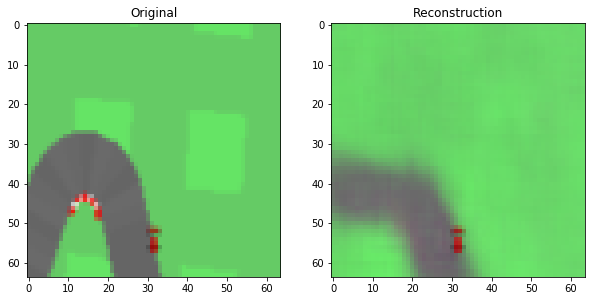

Visualise latent factor 7, original value=0.97


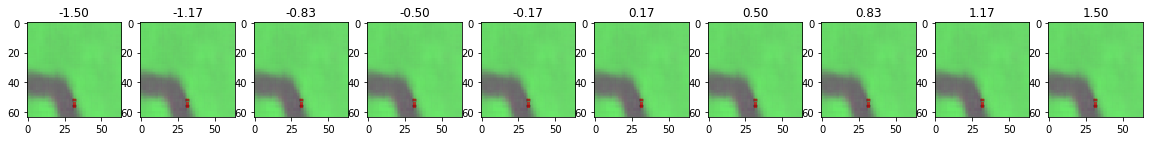

In [55]:
plot_latent_variations(frame, vae, factor=7)

Latent vector z
[-0.8796 -0.3747 -1.4345 -0.1562 -1.4474  0.5026 -0.74   -0.5528  1.1356  0.6354  1.0268  0.4149
  0.3425  0.0359 -1.8085 -0.3123 -0.6728  0.0756  1.2694  1.0641  0.7181 -0.4019  0.5702 -0.7814
 -0.2056 -0.3982 -0.2651 -0.6152 -0.1655  1.0597 -1.0522 -0.6332]


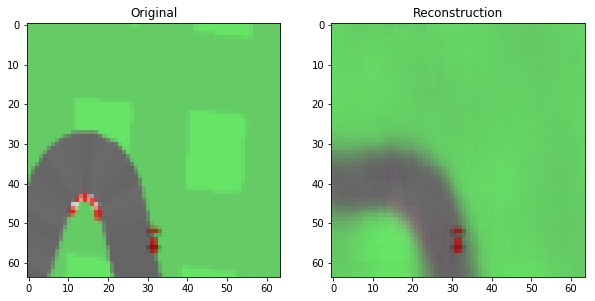

Visualise latent factor 2, original value=-1.43


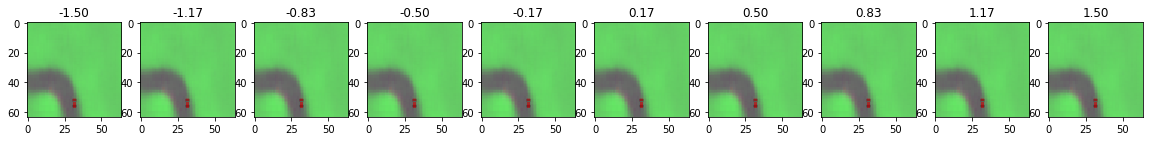

In [56]:
plot_latent_variations(frame, beta_vae, factor=2)